In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
car_price = pd.read_csv('archive (2).zip')

In [4]:
car_price.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
car_price.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.642584,0.32,1.2,6.4,9.9,92.6
Driven_kms,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


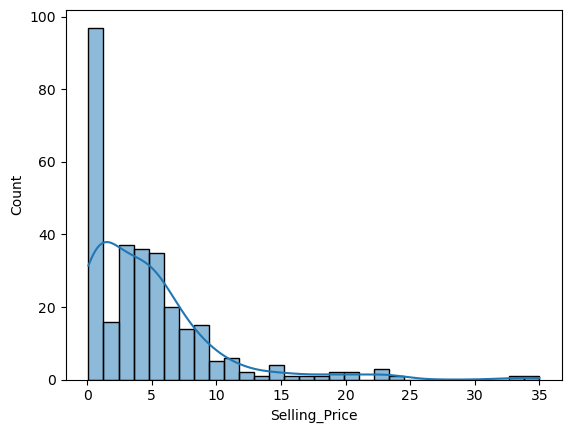

In [14]:
sns.histplot(x = 'Selling_Price' , data = car_price, kde = True , bins = 30)
plt.show()

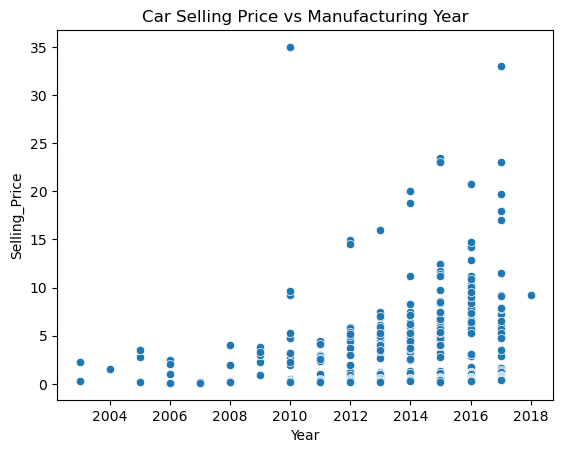

In [13]:
sns.scatterplot(x='Year', y='Selling_Price', data=car_price)
plt.title("Car Selling Price vs Manufacturing Year")
plt.show()


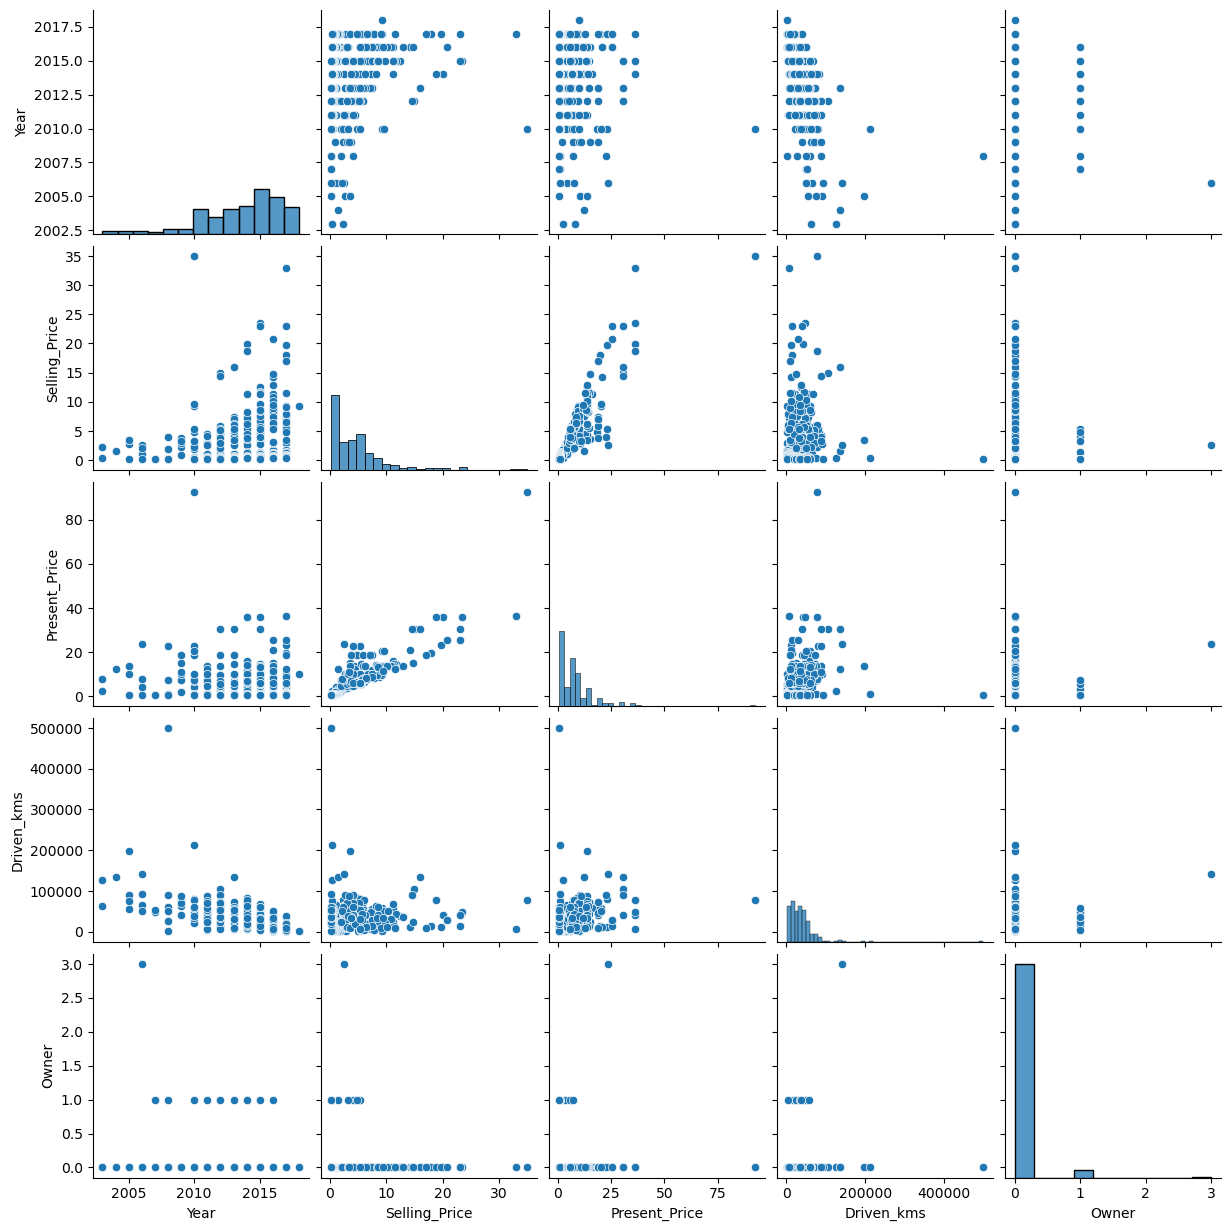

In [15]:
sns.pairplot(car_price)

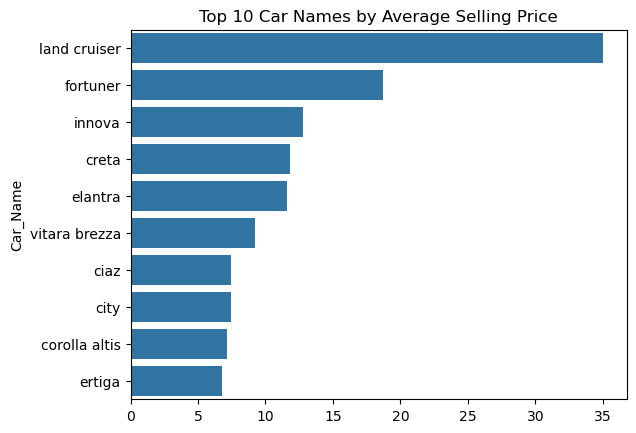

In [16]:
avg_prices = car_price.groupby('Car_Name')['Selling_Price'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_prices.values, y=avg_prices.index)
plt.title("Top 10 Car Names by Average Selling Price")
plt.show()


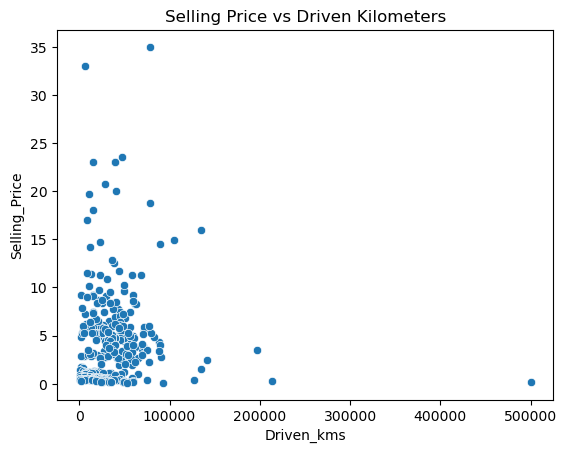

In [19]:
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=car_price)
plt.title("Selling Price vs Driven Kilometers")
plt.show()


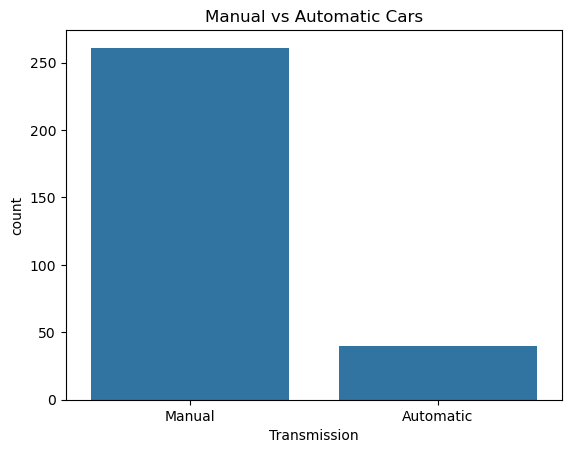

In [20]:
sns.countplot(x='Transmission', data=car_price)
plt.title("Manual vs Automatic Cars")
plt.show()


In [21]:
car_price['Car_Name'].value_counts()

Car_Name
city                  26
corolla altis         16
verna                 14
fortuner              11
brio                  10
                      ..
Honda Activa 125       1
Hero Hunk              1
Hero  Ignitor Disc     1
Hero  CBZ Xtreme       1
Bajaj  ct 100          1
Name: count, Length: 98, dtype: int64

In [22]:
car_price['Brand'] = car_price['Car_Name'].str.split().str[0]


In [23]:
car_price['Brand'].value_counts()


Brand
city        26
Bajaj       25
corolla     17
Royal       17
Honda       17
Hero        15
verna       14
etios       11
fortuner    11
brio        10
ciaz         9
innova       9
i20          9
grand        8
Yamaha       8
TVS          8
jazz         7
amaze        7
sx4          6
eon          6
alto         6
ertiga       6
i10          5
swift        5
dzire        4
wagon        4
ritz         4
KTM          4
creta        3
xcent        3
Activa       3
elantra      2
800          1
ignis        1
vitara       1
s            1
Hyosung      1
Mahindra     1
UM           1
land         1
baleno       1
omni         1
camry        1
Suzuki       1
Name: count, dtype: int64

In [24]:
car_price.drop('Car_Name', axis=1, inplace=True)


In [25]:
car_price['Brand'].value_counts()

Brand
city        26
Bajaj       25
corolla     17
Royal       17
Honda       17
Hero        15
verna       14
etios       11
fortuner    11
brio        10
ciaz         9
innova       9
i20          9
grand        8
Yamaha       8
TVS          8
jazz         7
amaze        7
sx4          6
eon          6
alto         6
ertiga       6
i10          5
swift        5
dzire        4
wagon        4
ritz         4
KTM          4
creta        3
xcent        3
Activa       3
elantra      2
800          1
ignis        1
vitara       1
s            1
Hyosung      1
Mahindra     1
UM           1
land         1
baleno       1
omni         1
camry        1
Suzuki       1
Name: count, dtype: int64

In [26]:
bike_brands = ['Bajaj', 'Hero', 'Royal', 'Yamaha', 'TVS', 'KTM', 'Activa', 'Hyosung', 'UM']
car_price = car_price[~car_price['Brand'].isin(bike_brands)]


In [28]:
brand_counts = car_price['Brand'].value_counts()
rare_brands = brand_counts[brand_counts < 3].index
car_price.loc[:,'Brand'] = car_price['Brand'].replace(rare_brands, 'Other')


In [29]:
car_price = pd.get_dummies(car_price, 
                           columns=['Fuel_Type', 'Selling_type', 'Transmission', 'Brand'], 
                           drop_first=True)


In [30]:
car_price['Car_Age'] = 2025 - car_price['Year']
car_price.drop('Year', axis=1, inplace=True)


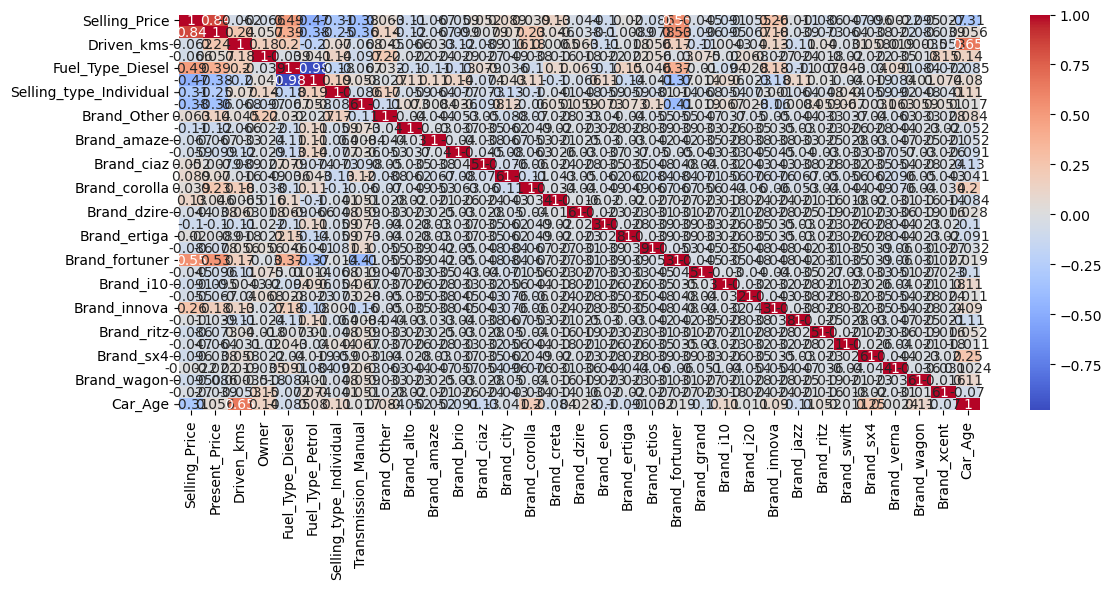

In [33]:
corr = car_price.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.tight_layout()
plt.show()

In [34]:
X = car_price.drop('Selling_Price', axis=1)
y = car_price['Selling_Price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [35]:
from sklearn.linear_model import LinearRegression


In [36]:
model = LinearRegression()

In [37]:
model.fit(X_train, y_train)


LinearRegression()

In [38]:
y_pred = model.predict(X_test)


In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))


MAE: 1.2457785298171218
MSE: 4.086533570034504
RMSE: 2.0215176402976316
R²: 0.8940153206666113


In [41]:
from sklearn.ensemble import RandomForestRegressor


In [42]:
rf_model = RandomForestRegressor(
    n_estimators=100,   
    random_state=42     
)


In [43]:
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [44]:
y_pred_rf = rf_model.predict(X_test)


In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R²:", r2_score(y_test, y_pred_rf))


Random Forest Performance:
MAE: 1.0439106060606056
MSE: 6.223262476818174
RMSE: 2.4946467639363643
R²: 0.8385990310101588


In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


In [47]:
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 500],      
    'max_depth': [None, 5, 10, 20],       
    'min_samples_split': [2, 5, 10],      
    'min_samples_leaf': [1, 2, 4]         
}


In [48]:
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                  
    n_jobs=-1,             
    scoring='r2',          
    verbose=2
)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='r2', verbose=2)

In [49]:
best_rf = grid_search.best_estimator_

y_pred_best = best_rf.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("Tuned Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("MSE:", mean_squared_error(y_test, y_pred_best))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))
print("R²:", r2_score(y_test, y_pred_best))


Tuned Random Forest Performance:
MAE: 1.067932051336733
MSE: 6.702045584442607
RMSE: 2.5888309300614067
R²: 0.8261817405946562


In this project, we analyzed a car price dataset and applied different regression models to predict the selling price of cars.

Exploratory Data Analysis (EDA): We studied key features such as car year, present price, kilometers driven, fuel type, and transmission. We observed clear trends, e.g., newer cars and certain brands tend to have higher resale values.

Modeling:

Linear Regression performed well with an R² score of 0.89, indicating a strong linear relationship between features and selling price.

Random Forest Regressor achieved an R² score of 0.84, showing slightly lower performance compared to Linear Regression, but still captured non-linear relationships.

Tuned Random Forest did not outperform the default version, highlighting that the default parameters were already close to optimal for this dataset.

Final Model: We selected Linear Regression as the best-performing model for this dataset due to its higher R² score and lower errors (MAE = ~1.24).

Key Insights:

Car age, present price, and fuel type are the most important factors affecting resale value.

Feature scaling played an important role in improving model accuracy.

Simple models can sometimes outperform complex ones depending on dataset size and characteristics.

Overall, this project demonstrates the complete ML pipeline — from data cleaning and EDA to model training, evaluation, and tuning.